<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/PyRadiomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone git://github.com/Radiomics/pyradiomics
!pip3 install pyradiomics

Cloning into 'pyradiomics'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 5750 (delta 5), reused 7 (delta 2), pack-reused 5730
Receiving objects: 100% (5750/5750), 54.34 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (3849/3849), done.
     |████████████████████████████████| 163kB 9.2MB/s 
     |████████████████████████████████| 4.4MB 27.4MB/s 
     |████████████████████████████████| 42.5MB 46kB/s 
     |████████████████████████████████| 40kB 4.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: PyWavelets 1.1.1
    Uninstalling PyWavelets-1.1.1:
      Successfully uninstalled PyWavelets-1.1.1


Content


*   Load data/image
*   Data/image visualization
*   Feature extraction
*   Feature extraction with image filering
*   Feature visualization





In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import six
import radiomics
from radiomics import featureextractor
import SimpleITK as sitk
from radiomics import getTestCase

In [4]:
# Define the testcase name
testCase = 'brain1'
print(os.getcwd())

dataDir = os.path.join(os.getcwd(), "..", "..", "data")
print("dataDir, relative path:", dataDir)
print("dataDir, absolute path:", os.path.abspath(dataDir))

# Store the file paths of our testing image and label map into two variables
imagePath = os.path.join(dataDir, testCase + "_image.nrrd")
labelPath = os.path.join(dataDir, testCase + "_label.nrrd")

# Additonally, store the location of the example parameter file, stored in \pyradiomics\bin
paramPath = os.path.join(os.getcwd(), "..", "Params.yaml")
print("Parameter file, absolute path:", os.path.abspath(paramPath))

imagePath, maskPath = radiomics.getTestCase('brain1')
print(imagePath)
print(maskPath)

if imagePath is None or maskPath is None:  
    raise Exception('Error getting testcase!')  

paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')
print('Parameter file, absolute path:', os.path.abspath(paramPath))

/content
dataDir, relative path: /content/../../data
dataDir, absolute path: /data
Parameter file, absolute path: /Params.yaml
/tmp/pyradiomics/data/brain1_image.nrrd
/tmp/pyradiomics/data/brain1_label.nrrd
Parameter file, absolute path: /examples/exampleSettings/Params.yaml


(256, 256, 25)


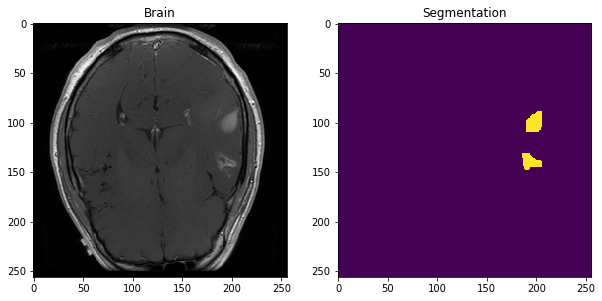

In [5]:
#image Visualization 
imagepath, labelpath = getTestCase('brain1')
image = sitk.ReadImage(imagepath)
label = sitk.ReadImage(labelpath)
print(image.GetSize())


plt.figure(figsize=(10,10))
# First image
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(image)[12,:,:], cmap="gray")
plt.title("Brain")
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(label)[12,:,:])        
plt.title("Segmentation")

plt.show()

In [6]:
extractor = featureextractor.RadiomicsFeatureExtractor()

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [7]:
result = extractor.execute(imagePath, maskPath)
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : 2.2.0
	 diagnostics_Versions_Numpy : 1.17.3
	 diagnostics_Versions_SimpleITK : 1.2.3
	 diagnostics_Versions_PyWavelet : 1.0.0
	 diagnostics_Versions_Python : 3.6.8
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : 5c9ce3ca174f0f8324aa4d277e0fef82dc5ac566
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (0.7812499999999999, 0.7812499999999999, 6.499999999999998)
	 diagnostics_Image-original_Size : (256, 256, 25)
	 diagnostics_Ima